# 선형 회귀(Linear Regression)
* 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것
* 국어 성적과 수학 성적, 키와 몸무게, 치킨 파매량과 맥주 판매량 등 2개의 데이터에 대한 경향성을 예측할 때 사용 

### 지역별 인구증가율과 고령인구율 

#### 시각화 

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
# 한글 폰트 깨질 때  
from matplotlib import font_manager, rc, use
#import tkinter
import matplotlib
#matplotlib.use('TkAgg')
font_path = "../utils/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

17


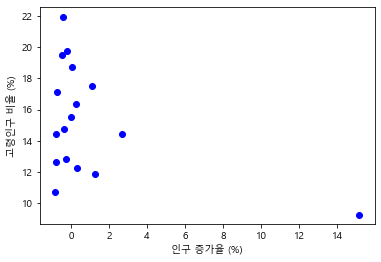

In [8]:
# 인구 증가율 
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
# 고령인구 비율 
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

print(len(population_inc))
plt.plot(population_inc, population_old, 'bo')    # 파란 둥근점 
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()

* 위의 그래프는 오른쪽 아래 극단치(outlier)를 하나 가지고 있다. 이는 일반적인 경향에서 벗어나기 때문에 제거한다. 

C:\Users\pc\Anaconda3\envs\tf2-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\Anaconda3\envs\tf2-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


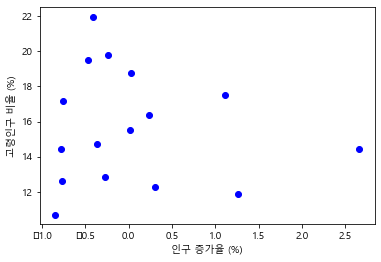

In [9]:
X = population_inc[:5] + population_inc[6:]
Y = population_old[:5] + population_old[6:]
plt.plot(X, Y, 'bo')    # 파란 둥근점 
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()

#### 선형 회귀 사용 
* 데이터 경향성 : 하나의 직선과 각 데이터의 차이(residual-잔차)
* 최소 제곱법(Least Square Method) : 잔차의 제곱을 최소화하는 알고리즘 

#### 변수 초기화(W, b)
* 가중치 W와 편향 b를 램던한 값으로 초기화 한다 --> random.random()을 사용해도 좋다. 

In [10]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
vars = [W, b]
print(vars)

[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.6767765], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.02865576], dtype=float32)>]


#### 가설 
* 제공되는 W와 b에 의해서 반환되는 정보를 가설이라 한다. 

In [11]:
def hypothesis(X):
    return X * W + b

hypothesis(X)

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 0.17437722, -0.55654144,  0.8240827 , -0.00835246,  0.7225662 ,
        0.13377061, -0.19108212, -0.34674072, -0.5497737 , -0.27906308,
       -0.6039158 , -0.30613413, -0.21138543, -0.01512023, -0.54300594,
        1.7715698 ], dtype=float32)>

#### 비용함수 
* 전차의 제곱의 평균을 비용으로 계산한다.
* Y : 실제 값
* y_pred : hypothesis(X)에 의해 계산된 기대 값 

In [12]:
def loss_fn():
    y_pred = hypothesis(X)
    loss = tf.reduce_mean(tf.square(Y - y_pred))
    return loss
loss_fn()

<tf.Tensor: shape=(), dtype=float32, numpy=255.66864>

####  최적화 수행 
* 손실을 최소화 하는 것이 목표 
* optimizer는 복잡한 미분과 가중치 업데이트를 자동으로 해주는 편리한 도구 
* lr(learning rate-학습률) : 적당한 학습률을 넣으면 안정적이고 효율적으로 학습 수행(보통 0.1 ~ 0.0001 사이의 수 사용)  

In [13]:
optimizer = tf.optimizers.Adam(lr=0.07)

#### 학습 
* optimizer.minimize(loss_fn, var_list = vars)
* loss_fn : 최소화할 손실 
* var_list = vars : 학습시킬 변수의 리스트 

In [14]:
for i in range(1001):
    optimizer.minimize(loss_fn, var_list = vars)  # vars = [W, b]
    loss = loss_fn()
    if i % 100 == 0:
        print(i, 'W:', W.numpy(), 'b:', b.numpy(), 'loss:', loss.numpy())

0 W: [0.6067751] b: [0.04134633] loss: 253.46255
100 W: [0.13547346] b: [6.4216995] loss: 95.10087
200 W: [-0.10529115] b: [10.955427] loss: 31.950024
300 W: [-0.24839756] b: [13.647846] loss: 13.857673
400 W: [-0.31760925] b: [14.950094] loss: 10.296886
500 W: [-0.34460646] b: [15.458062] loss: 9.825328
600 W: [-0.35312194] b: [15.618289] loss: 9.7834015
700 W: [-0.35529897] b: [15.659248] loss: 9.780905
800 W: [-0.3557486] b: [15.667713] loss: 9.7808075
900 W: [-0.3558236] b: [15.669116] loss: 9.780804
1000 W: [-0.35583335] b: [15.669302] loss: 9.780804


#### 그래프 그리기

In [17]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = W * line_x + b

C:\Users\pc\Anaconda3\envs\tf2-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\Anaconda3\envs\tf2-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


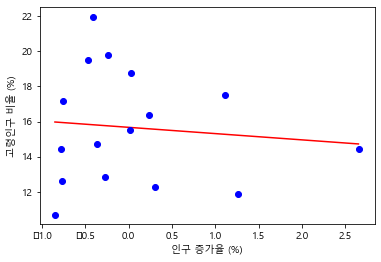

In [16]:
plt.plot(line_x,line_y,'r-')      # 빩간색 라인 
plt.plot(X,Y,'bo')                # 파란색 점
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()